### Simple Regression Model to Predict delivery time using sorting time.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data=pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Performing EDA on given Data

In [113]:
data.shape

(21, 2)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [115]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [116]:
data[data.duplicated()].shape

(0, 2)

In [117]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [118]:
data=data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [119]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Data Visualization 

{'whiskers': [<matplotlib.lines.Line2D at 0x277c76539d0>,
 'caps': [<matplotlib.lines.Line2D at 0x277c7653f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x277c7653700>],
 'medians': [<matplotlib.lines.Line2D at 0x277c7660550>],
 'fliers': [<matplotlib.lines.Line2D at 0x277c7660820>],
 'means': []}

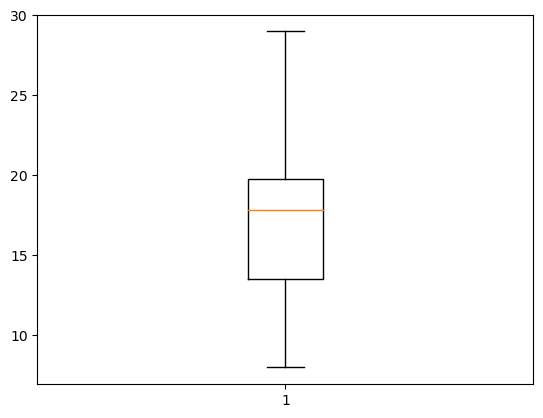

In [120]:
plt.boxplot(data['Delivery_Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x277c769d670>,
 'caps': [<matplotlib.lines.Line2D at 0x277c769dc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x277c769d400>],
 'medians': [<matplotlib.lines.Line2D at 0x277c76a71f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x277c76a74c0>],
 'means': []}

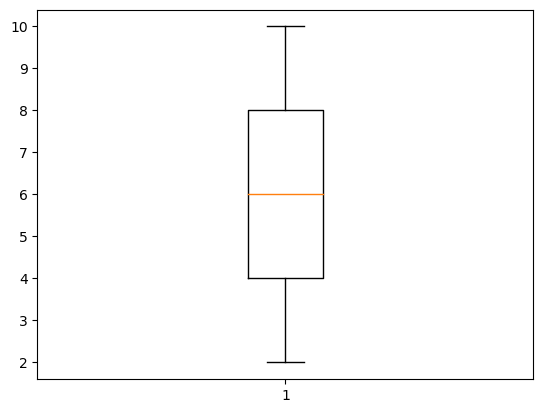

In [121]:
plt.boxplot(data['Sorting_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

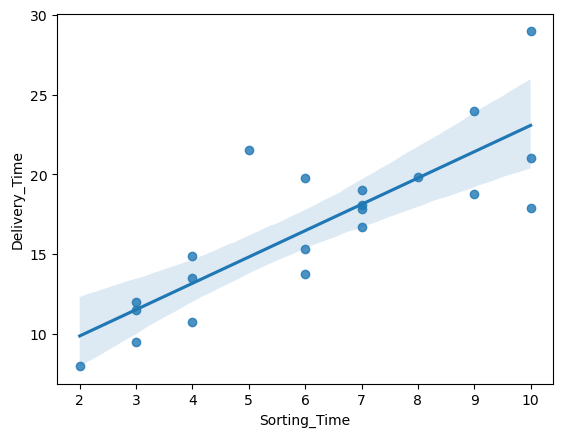

In [122]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data)

### Correlation

In [123]:
cor=data.corr()
cor

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

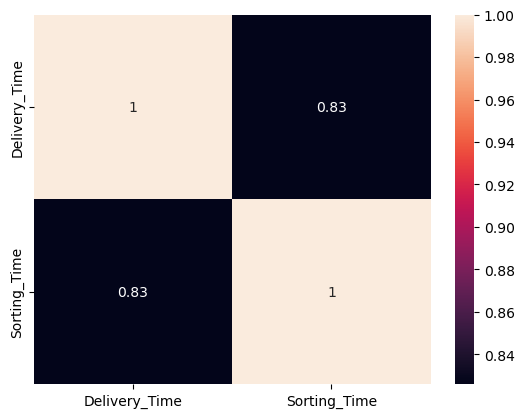

In [124]:
sns.heatmap(cor,annot=True)

### Fitting Our Regression Model

In [125]:
import statsmodels.formula.api as sfa

In [126]:
model=sfa.ols('Delivery_Time~Sorting_Time',data=data).fit()

In [127]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        13:35:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The required equation will be: y(Delivery_Time)=6.58+1.65*Sorting_Time

## Predictiction for new delivery time

In [128]:
newdata=pd.Series([5,8,4])
newdata

0    5
1    8
2    4
dtype: int64

In [129]:
pred_time=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [130]:
model.predict(pred_time)

0    14.827833
1    19.774893
2    13.178814
dtype: float64

In [131]:
pred_time['Delivery_Time']=model.predict(pred_time)

In [132]:
round(pred_time,2)

,Sorting_Time,Delivery_Time
0,5,14.83
1,8,19.77
2,4,13.18


In [133]:
'''The model has been build and tested successfully to Predict delivery time using sorting time.
   It gives 68% of accuracy which means the 68% of values lies on the line of dataset.So, the model has designed the 
   rule such that when you pass the sorting time will be give you delivery time as an output.'''

'The model has been build and tested successfully to Predict delivery time using sorting time.\n   It gives 68% of accuracy which means the 68% of values lies on the line of dataset.So, the model has designed the \n   rule such that when you pass the sorting time will be give you delivery time as an output.'